# <center><span style="color:black"> Homework III - Statistical learning and Big data </style></center>
##  <center><span style="color:black"> Student : Khalil Zlaoui </style></center>

# Question 3

### Classification error
Recall that classification error is computed as:

$E=1-max_{k}(\hat{p}_{mk})$

In our case we have 2 classes, i.e. $k\in \{1,2\}$. Using that $\hat{p}_{m1}=1-\hat{p}_{m2}$, we have that :

$E=1-max(\hat{p}_{m1},\hat{p}_{m2})=1-max(\hat{p}_{m1},1-\hat{p}_{m1})$

### Gini index
$G=\sum_{k=1}^{2}\hat{p}_{mk}(1-\hat{p}_{mk})=\hat{p}_{m1}(1-\hat{p}_{m1})+\hat{p}_{m2}(1-\hat{p}_{m2})$

Using that $\hat{p}_{m1}=1-\hat{p}_{m2}$, we have that :

$G=\hat{p}_{m1}(1-\hat{p}_{m1})+\hat{p}_{m1}(1-\hat{p}_{m1})$

$G=2*(\hat{p}_{m1}(1-\hat{p}_{m1}))$

### Cross-entropy
$D=-\sum_{k=1}^{K}\hat{p}_{mk}*log(\hat{p}_{mk})=-[\hat{p}_{m1}*log(\hat{p}_{m1})+\hat{p}_{m2}*log(\hat{p}_{m2})]$

$=-[\hat{p}_{m1}*log(\hat{p}_{m1})+(1-\hat{p}_{m1})*log(1-\hat{p}_{m1})]$

$=-[\hat{p}_{m1}*log(\hat{p}_{m1})+(1-\hat{p}_{m1})*log(1-\hat{p}_{m1})]$

$=-[log(\hat{p}_{m1}^{\hat{p}_{m1}})+log(1-\hat{p}_{m1})^{(1-\hat{p}_{m1})}]$

$=-log(\hat{p}_{m1}^{\hat{p}_{m1}}(1-\hat{p}_{m1})^{(1-\hat{p}_{m1})})$

$=-log(\frac{\hat{p}_{m1}}{1-\hat{p}_{m1}}^{\hat{p}_{m1}}(1-\hat{p}_{m1}))$


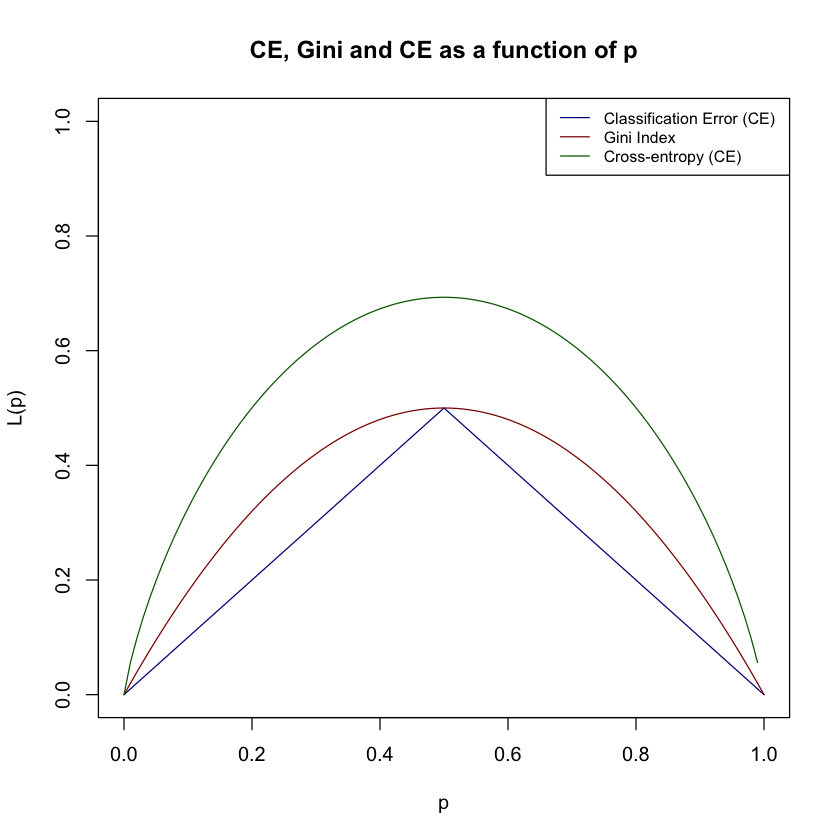

In [26]:
x<-seq(0,1,0.01)

E = function(x){1-max(x,1-x)}
Eofx<-lapply(x,E)
plot(x,Eofx,xlim=c(0,1),ylim=c(0,1),type="l",col="darkblue",xlab="p",ylab="L(p)",main="CE, Gini and CE as a function of p")


G = function(x){2*x*(1-x)}
Gofx<-lapply(x,G)
lines(x,Gofx,xlim=c(0,1),type="l",col="darkred")

D = function(x){-log((1-x)*((x/(1-x))^x))}
Dofx<-lapply(x,D)
lines(x,Dofx,xlim=c(0,1),type="l",col="darkgreen")

legend("topright", legend=c("Classification Error (CE)", "Gini Index", "Cross-entropy (CE)"),
       col=c("darkblue", "darkred","darkgreen"), lty=1, cex=0.8)


The loss functions attein their maximum at p=0.5, which is expected: 

When $\hat{p}_{m1}$ is 0.5, it is most unclear whether a data point should be classified in class 1 or 2. Essentially, the region in the tree will perform a random assignment to class 1 or 2.

When p is far off 0.5, the classifier performs better. This is because for a particular region of the tree, most observations will be classified to either class 1 or 2.

The Cross-entropy penalty is higher than the Gini index penalty, which is higher than the classification error penalty. Both Cross-entropy and Gini penalize more for values around 0.5 (e.g. values in $[0.4;0.6]$) due to the smoothness of the curves. Classification error being non-smooth penalizes these values less. In that sense, all classifiers consider a good decision node one that results in value of $\hat{p}_{m1}$ that is furthest from values surrounding p=0.5. This is even more true for Cross-entropy and Gini.

# Question 4

See attachement

# Question 5

### Majority vote:
$class=\mathbb{1}(p>0.5)$
6 bootstrapped datasets indicate that class should be 1, and 4 that class should be 0.

By majority vote, class is 1.

### Average probability:
The average of probabilities $\bar{p}$ is 0.45.

$class=\mathbb{1}(\bar{p}>0.5)$

By average probability, the class is 0.


# Question 7

In [1]:
library(MASS)
data(Boston)
#head(Boston)

set.seed (1)
train=sample(1:nrow(Boston), nrow(Boston)/2)
train.Boston<-Boston[train,]
test.Boston<-Boston[-train,]

In [ ]:
#install.packages("randomForest",lib='/anaconda3/envs/R/lib/R/library')
#library(randomForest,lib='/anaconda3/envs/R/lib/R/library')

library(randomForest)
ntree=c(1,seq(10,500,10))
mtry=seq(1,ncol(Boston)-1,1)

set.seed(1)

E <- matrix(NA, nrow =length(ntree), ncol=length(mtry))
i=0


for (t in ntree)
{i=i+1
 j=0
    
    for (m in mtry)
        
        {j=j+1
        rf.boston<-randomForest(medv~.,data=train.Boston,mtry=m,ntree=t)
        yhat.ref<-predict(rf.boston,newdata=test.Boston)
        e<-mean((yhat.ref-test.Boston$medv)^2)

        E[i,j]<-e
    }
    
}

E

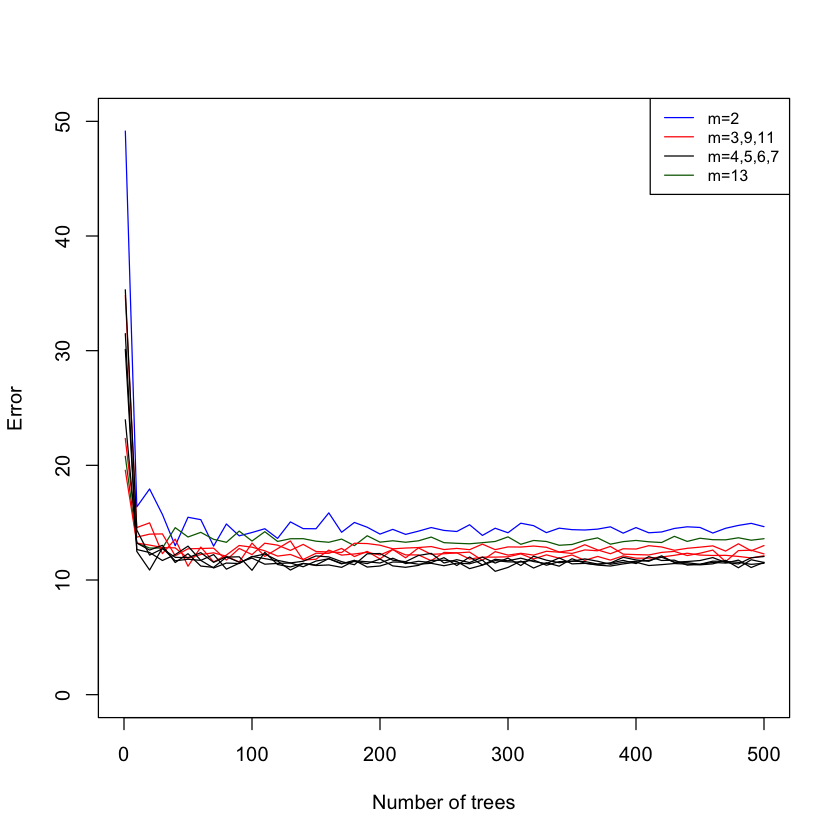

In [191]:
plot(c(1,seq(10,500,10)),E[,2],type="l",col="blue",xlim=c(0,500),ylim=c(0,50),xlab="Number of trees",
    ylab="Error")
lines(c(1,seq(10,500,10)),E[,13],type="l",col="darkgreen")

lines(c(1,seq(10,500,10)),E[,3],type="l",col="red")
lines(c(1,seq(10,500,10)),E[,9],type="l",col="red")
lines(c(1,seq(10,500,10)),E[,11],type="l",col="red")


lines(c(1,seq(10,500,10)),E[,4],type="l",col="black")
lines(c(1,seq(10,500,10)),E[,5],type="l",col="black")
lines(c(1,seq(10,500,10)),E[,6],type="l",col="black")
lines(c(1,seq(10,500,10)),E[,7],type="l",col="black")



legend("topright", legend=c("m=2","m=3,9,11","m=4,5,6,7","m=13"),
       col=c("blue", "red","black","darkgreen"), lty=1, cex=0.8)

Overall, we notice that error rates decrease as the number of trees increases. This happens quite quickly, and it seems that after approximatley 20/30 trees, increasing the number of trees is pointless.

We notice that when $m$ is either very few variables or too many variables (e.g. 2 or 13), the error rate is higher (blue and green lines).

We notice that when m is close to $\frac{N variables}{3}$ where $N variables=13$, the error rate is minimal (black lines), which is in line with the best practice recommendations.

Red lines represent intermediary values of m.

# Question 8

In [ ]:
#install.packages("ISLR")
library(ISLR)
#head(Carseats)

### Question (a)

In [10]:
set.seed(1)
train=sample(1:nrow(Carseats), nrow(Carseats)/2)
train.Carseats<-Carseats[train,]
test.Carseats<-Carseats[-train,]

### Question (b)

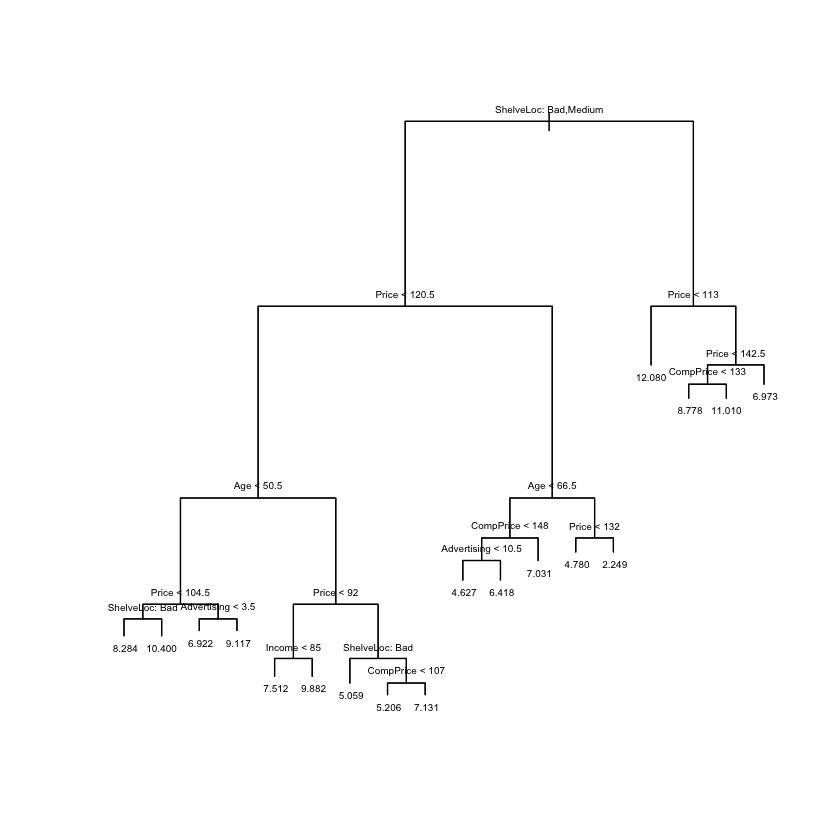

In [22]:
#install.packages("tree")
library(tree)
tree.carseats=tree(Sales~.,train.Carseats)

plot(tree.carseats)
text(tree.carseats ,pretty =0,cex=0.5)

In [23]:
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = train.Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "Income"     
[6] "CompPrice"  
Number of terminal nodes:  18 
Residual mean deviance:  2.36 = 429.5 / 182 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.2570 -1.0360  0.1024  0.0000  0.9301  3.9130 

Interpretation: Only the variables "ShelveLoc","Price","Age","Advertising","Income" and "CompPrice" were used to construct the tree, which contains 18 nodes. The quality of shelving location for the car seats at each site ("ShelveLoc") and the price are most important in determining unit sales.

In [110]:
MSE=sum((predict(tree.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE before pruning is ",round(MSE)))

[1] "MSE before pruning is 830"


### Question (c)

In [111]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.tree)
cv.carseats

$size
 [1] 18 17 16 15 14 12 11 10  9  8  7  6  5  4  3  1

$dev
 [1] 1173.981 1166.864 1166.864 1137.000 1131.579 1147.937 1146.406 1134.443
 [9] 1134.443 1120.350 1093.073 1139.802 1204.011 1211.252 1238.071 1635.160

$k
 [1]      -Inf  15.48181  15.53599  18.69038  18.74886  21.05038  23.79480
 [8]  25.78579  26.01210  30.10435  32.74801  53.28569  72.33061  78.19599
[15] 141.73781 251.22901

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

The tree with 7 nodes (deviance=1093) results in the lowest deviance.

In [114]:
prune.carseats=prune.tree(tree.carseats,best=7)

MSE=sum((predict(prune.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE after pruning is ",round(MSE)))

[1] "MSE after pruning is 1068"


Pruning did not improve test error rate.

### Question (d)

In [130]:
library(randomForest)
bag.carseats=randomForest(Sales~.,data=train.Carseats,mtry=ncol(train.Carseats)-1,importance=TRUE)

In [131]:
bag.carseats
MSE=sum((predict(bag.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE after bagging is ",round(MSE)))


Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = ncol(train.Carseats) -      1, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.877655
                    % Var explained: 62.3

[1] "MSE after bagging is 514"


The MSE is lower with bagging.

In [123]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,13.8646449,136.43180
Income,7.4045125,80.15002
Advertising,17.1882699,127.08103
Population,0.6145555,63.49453
Price,59.9040407,502.44667
ShelveLoc,42.3381011,320.87003
Age,22.8145048,189.27905
Education,0.6036063,40.17026
Urban,-1.6443605,8.58691
US,4.8385881,13.30952


As noted earlier, shelve location and price are most importanct.

### Question (e)

In [133]:
set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=(ncol(train.Carseats))/3,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests is ",round(MSE)))


Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = (ncol(train.Carseats))/3,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 3.065843
                    % Var explained: 59.83

[1] "MSE with random forests is 600"


In [134]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,7.954043,126.20405
Income,5.866740,119.80326
Advertising,13.190995,136.49938
Population,-2.574956,88.47539
Price,42.196258,423.30831
ShelveLoc,36.262253,267.16104
Age,18.036614,200.42186
Education,1.313234,60.39165
Urban,-2.384005,12.03180
US,6.984257,27.07098


Price and shelve location are still the most important variables.

In [139]:
set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=1,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=1 is ",round(MSE)))

set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=3,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=3 is ",round(MSE)))

set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=5,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=5 is ",round(MSE)))

set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=7,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=7 is ",round(MSE)))

set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=9,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=9 is ",round(MSE)))

set.seed(1)
rf.carseats=randomForest(Sales~.,data=train.Carseats,mtry=10,importance=TRUE)
rf.carseats
MSE=sum((predict(rf.carseats,newdata=test.Carseats)-test.Carseats$Sales)^2)
print(paste0("MSE with random forests with m=10 is ",round(MSE)))


Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 1,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 4.854405
                    % Var explained: 36.4

[1] "MSE with random forests with m=1 is 1016"



Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 3,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 3.26604
                    % Var explained: 57.21

[1] "MSE with random forests with m=3 is 662"



Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 5,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 2.967775
                    % Var explained: 61.12

[1] "MSE with random forests with m=5 is 567"



Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 7,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 7

          Mean of squared residuals: 2.875913
                    % Var explained: 62.32

[1] "MSE with random forests with m=7 is 536"



Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 9,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 2.799532
                    % Var explained: 63.32

[1] "MSE with random forests with m=9 is 523"



Call:
 randomForest(formula = Sales ~ ., data = train.Carseats, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.825834
                    % Var explained: 62.98

[1] "MSE with random forests with m=10 is 511"


As the number of variables considered increases, the test error decreases. This makes sense as bagging was more powerful in this example. 

This suggests that trees are mostly decorrelated and that the procedure of randomly selecting variables in random forests is outperformed by the bagging approach.

# Question 9

### Question (a)

In [7]:
library(ISLR)
data(OJ)

set.seed (1)
train=sample(1:nrow(OJ), 800)

train.OJ<-OJ[train,]
test.OJ<-OJ[-train,]

#head(train.OJ)

### Question (b)

In [3]:
library(tree)
# There is no such variable as "Buy", as mentioned by the question

tree.OJ=tree(Purchase~.,data=train.OJ)
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = train.OJ)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7305 = 578.6 / 792 
Misclassification error rate: 0.165 = 132 / 800 

The tree uses 4 variables and has 8 terminal nodes.
The misclassification rate is 16.5%




### Question (c)

In [4]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1064.00 CH ( 0.61750 0.38250 )  
   2) LoyalCH < 0.508643 350  409.30 MM ( 0.27143 0.72857 )  
     4) LoyalCH < 0.264232 166  122.10 MM ( 0.12048 0.87952 )  
       8) LoyalCH < 0.0356415 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.0356415 109  100.90 MM ( 0.17431 0.82569 ) *
     5) LoyalCH > 0.264232 184  248.80 MM ( 0.40761 0.59239 )  
      10) PriceDiff < 0.195 83   91.66 MM ( 0.24096 0.75904 )  
        20) SpecialCH < 0.5 70   60.89 MM ( 0.15714 0.84286 ) *
        21) SpecialCH > 0.5 13   16.05 CH ( 0.69231 0.30769 ) *
      11) PriceDiff > 0.195 101  139.20 CH ( 0.54455 0.45545 ) *
   3) LoyalCH > 0.508643 450  318.10 CH ( 0.88667 0.11333 )  
     6) LoyalCH < 0.764572 172  188.90 CH ( 0.76163 0.23837 )  
      12) ListPriceDiff < 0.235 70   95.61 CH ( 0.57143 0.42857 ) *
      13) ListPriceDiff > 0.235 102   69.76 CH ( 0.89216 0.10784 ) *
     7) LoyalCH > 0.764572 278   86.14 

Let's interpret:  "2) LoyalCH < 0.508643 350  409.30 MM ( 0.27143 0.72857 )"

- "LoyalCH < 0.508643" is the split criterion. 
- There are 350 observations that verify LoyalCH < 0.508643.
- The deviance for that branch is 350
- The overall prediction for the branch is 72% MM and 27%CH

In [5]:
# Double checking:

summary(train.OJ[which(train.OJ$LoyalCH< 0.508643),]$Purchase)
255/(255+95)

CH  MM 
 95 255

[1] 0.7285714

### Question (d)

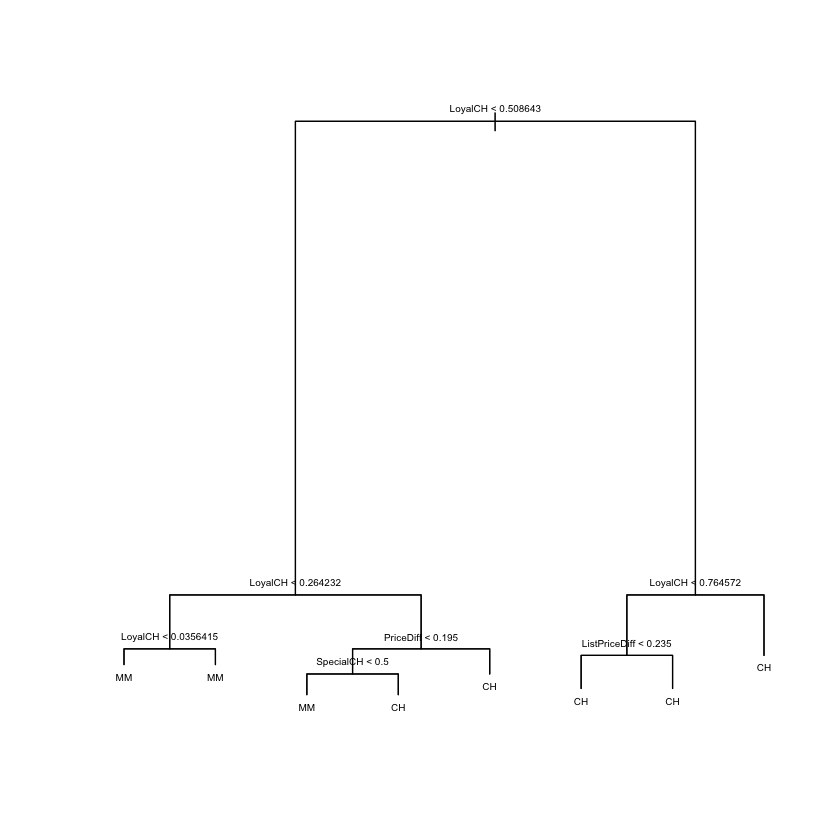

In [6]:
plot(tree.OJ)
text(tree.OJ ,pretty =0,cex=0.5)

Example of interpretation:
"If LoyalCH < 0.508643 and LoyalCH < 0.264232 and LoyalCH < 0.0356415 then Purchase is classified as MM".

In [7]:
# Double check:

summary(train.OJ[which(train.OJ$LoyalCH< 0.0356415),]$Purchase)
# The classification makes sense.

CH MM 
 1 56

### Question (e)

In [8]:
Testpredict.tree.OJ=predict(tree.OJ,newdata=test.OJ,type="class")
table(Testpredict.tree.OJ,test.OJ$Purchase)
round((12+49)/(147+12+49+62),3)

                   
Testpredict.tree.OJ  CH  MM
                 CH 147  49
                 MM  12  62

[1] 0.226

The test error rate is 22.6%

### Question (f)

In [9]:
set.seed(3)
cv.tree.OJ=cv.tree(tree.OJ,FUN=prune.misclass)
cv.tree.OJ

$size
[1] 8 5 2 1

$dev
[1] 151 151 157 306

$k
[1]       -Inf   0.000000   4.666667 160.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Both trees with 8 terminal nodes and 5 terminal nodes result in the lowest cross-validation error rate, with 151 cross-validation errors.

### Question (g)

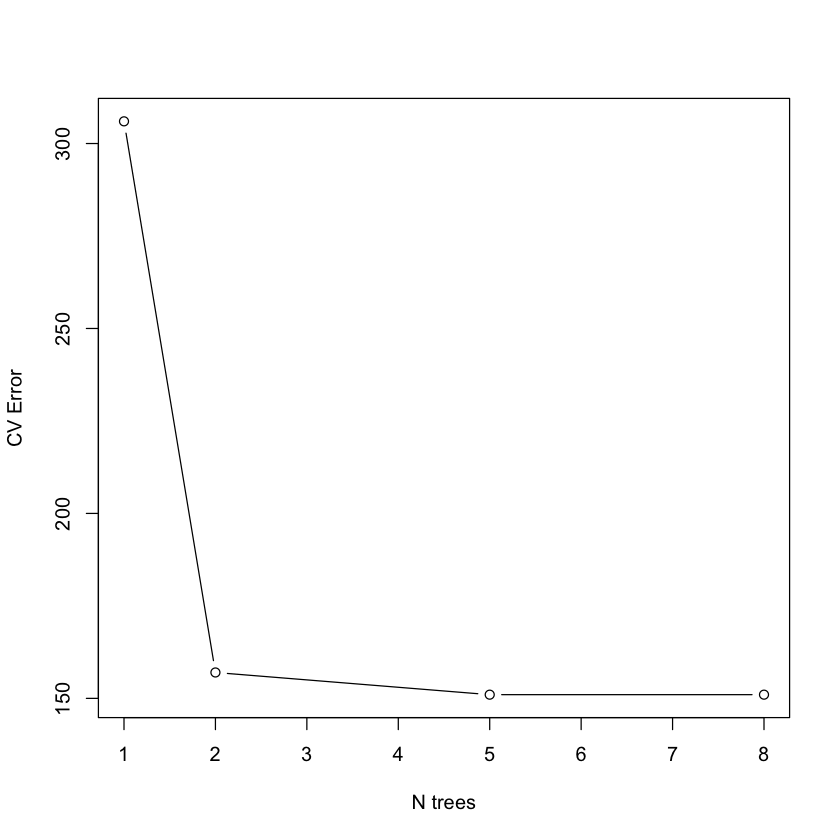

In [24]:
plot(cv.tree.OJ$size,cv.tree.OJ$dev,type="b",ylab="CV Error",xlab="N trees")

### Question (h)

Both trees with size 5 and 8 produce the same error.

### Question (i)


Classification tree:
snip.tree(tree = tree.OJ, nodes = 3:4)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "SpecialCH"
Number of terminal nodes:  5 
Residual mean deviance:  0.8256 = 656.4 / 795 
Misclassification error rate: 0.165 = 132 / 800 

         
tree.pred  CH  MM
       CH 147  49
       MM  12  62

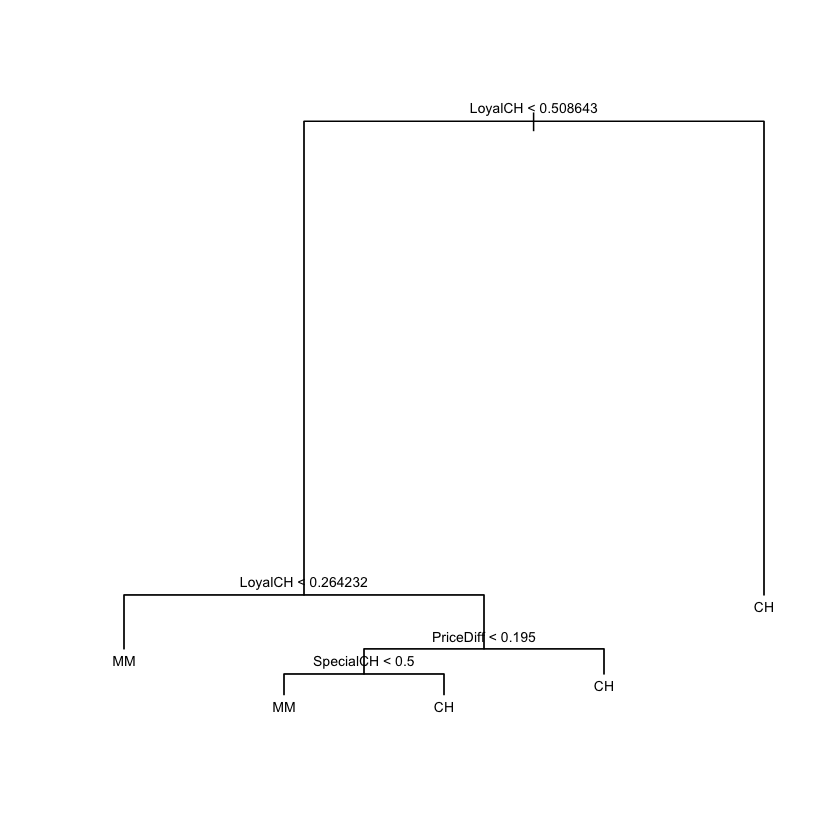

In [26]:
prune.OJ=prune.misclass(tree.OJ,best=5)
plot(prune.OJ)
text(prune.OJ,pretty=0,cex=0.7)

summary(prune.OJ)

tree.pred=predict(prune.OJ,test.OJ,type="class")
table(tree.pred,test.OJ$Purchase)

### Question (j) and (k)

Training error, non-pruned: 16.5%
Training error, pruned: 16.5%

Test error, non-pruned: 22.6%
Test error, pruned: 16.5%

Although training error is the same for non-pruned and pruned, pruning resulted in an improvement in test error.

# Question 11

### Question (a)

In [9]:
data(Caravan)
#nrow(Caravan)

Caravan$Purchase<-ifelse(Caravan$Purchase=="Yes",1,0)
train=seq(1,1000,1)
train.Caravan=Caravan[train,]
test.Caravan=Caravan[-train,]

#head(test.Caravan)

### Question (b)

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 50: PVRAAUT has no variation.”Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 71: AVRAAUT has no variation.”

,var,rel.inf
PPERSAUT,PPERSAUT,14.6350478
MKOOPKLA,MKOOPKLA,9.4709165
MOPLHOOG,MOPLHOOG,7.3145742
MBERMIDD,MBERMIDD,6.0865197
PBRAND,PBRAND,4.6676612
MGODGE,MGODGE,4.4946326
ABRAND,ABRAND,4.3242776
MINK3045,MINK3045,4.1759062
MOSTYPE,MOSTYPE,2.8640258
PWAPART,PWAPART,2.7819107


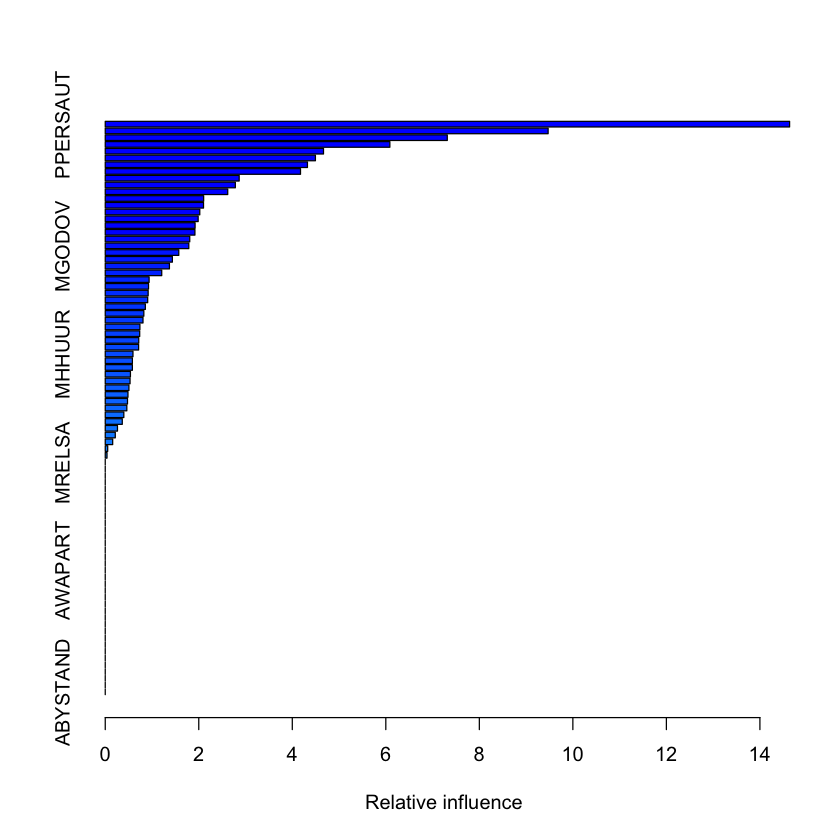

In [173]:
#install.packages("gbm")
library(gbm)
set.seed(1)
boost.Caravan=gbm(Purchase~.,data=train.Caravan,
                  distribution="bernoulli",n.trees=1000,
                 shrinkage=0.01)

summary(boost.Caravan)

PPersaut seems to be the most important variable

### Question (c)

In [174]:
predict.boost=predict(boost.Caravan,newdata=test.Caravan,n.trees=1000,type="response")
y.hat<-predict.boost
y.hat<-ifelse(y.hat>0.2,1,0)

print("truth:")
summary(as.factor(test.Caravan$Purchase))
table(y.hat,test.Caravan$Purchase)




[1] "truth:"


0    1 
4533  289

     
y.hat    0    1
    0 4410  256
    1  123   33

In [175]:
33/(123+33)

[1] 0.2115385

21% of the people predicted to make a purchase do in fact make one

### Logistic regression

In [189]:
library(glmnet)
log.reg<-glm(Purchase~.,data=train.Caravan, family="binomial")
#summary(log.reg)
y.hat<-predict(log.reg,newdata=test.Caravan,type="response")
y.hat<-ifelse(y.hat>0.2,1,0)


print("truth:")
summary(as.factor(test.Caravan$Purchase))
table(y.hat,test.Caravan$Purchase)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] "truth:"


0    1 
4533  289

     
y.hat    0    1
    0 4183  231
    1  350   58

In [190]:
58/(350+58)

[1] 0.1421569

Logistic regression performs worse in the sense that only 14% of those predicted to make a purchase do make one, vs. 21% for boosted trees.